# EE25737: Introduction to Machine Learning¶

## Shahab Rahimirad
## 95104663

First, we will open the dataset that we changed in the previous homework and cut it into the training data and the test data

In [ ]:
import pandas as pd
trainData= pd.read_csv("new_train_data.csv")
testData = trainData[0:179]
trainData = trainData[179:]
trainY = trainData['Survived']
trainData = trainData.drop(['Survived' , 'PassengerId'] , axis=1)
testY = testData['Survived']
testData = testData.drop(['Survived' , 'PassengerId'] , axis=1)

### logestic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#display(trainData)
lr = LogisticRegression()
lr.fit(trainData, trainY)
#print(lr.coef_)
#print(trainData.columns)
sortedcoef = []
for i in range(len(lr.coef_[0])):
    indx = list(lr.coef_[0]).index(sorted(lr.coef_[0])[i])
    sortedcoef.append(trainData.columns[indx])

print('sorted coef :' , sortedcoef)
    
trainPred = lr.predict(trainData)
testPred = lr.predict(testData)
print('test accuracy' , 1 - sum((testPred-list(testY))**2)/len(testPred))
print('train accuracy' , 1 - sum((trainPred-list(trainY))**2)/len(trainPred))

confMat = confusion_matrix(testY, testPred)
print('confusion matrix:')
print(confMat)

sorted coef : ['Man', 'Pclass', 'DeckNum=G', 'Alone', 'FamilyCount', 'E0', 'Parch', 'DeckNum=T', 'SibSp', 'Gender', 'DeckNum=C', 'E1E0', 'Age', 'Fare', 'DeckNum=F', 'E1', 'DeckNum=A', 'Mr', 'Miss', 'DeckNum=B', 'Girl', 'DeckNum=D', 'OtherTitles', 'DeckNum=E', 'Child', 'Woman']
test accuracy 0.8268156424581006
train accuracy 0.8328651685393258
confusion matrix:
[[101  19]
 [ 12  47]]


c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As seen above, among the features, being a woman has the most effect on surviving and being a man has the most effect on not surviving.
the accuracy of method on training data is 83% and the accuracy of method on test data is 82%.
As we can see on confusion matrix, true positive is 101 and true negative is 47. Meanwhile false positive is 19 and false negative is 12.

### k nearest neighbors

In [ ]:
###scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainData)

scaled_trainData = scaler.transform(trainData)
scaled_testData = scaler.transform(testData)


###training
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5 , p = 1) #norm1
classifier1.fit(scaled_trainData, trainY)
classifier2 = KNeighborsClassifier(n_neighbors=5 , p = 2) #norm2
classifier2.fit(scaled_trainData, trainY)
classifier3 = KNeighborsClassifier(n_neighbors=5 , p = 3) #norm3
classifier3.fit(scaled_trainData, trainY)

y_pred1 = classifier1.predict(scaled_testData)
print('error with norm1' , sum((y_pred1 - testY)**2) / len(testY))
y_pred2 = classifier2.predict(scaled_testData)
print('error with norm2' , sum((y_pred2 - testY)**2) / len(testY))
y_pred3 = classifier3.predict(scaled_testData)
print('error with norm3' , sum((y_pred3 - testY)**2) / len(testY))
#print(y_pred2 - testY)
#print(y_pred3 - testY)

error with norm1 0.20670391061452514
error with norm2 0.18994413407821228
error with norm3 0.18994413407821228


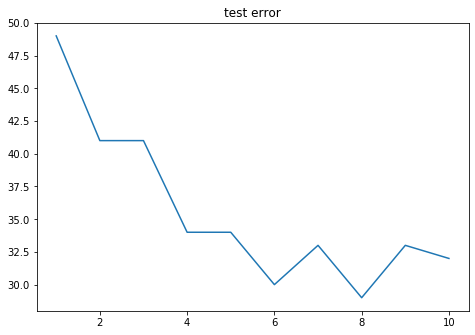

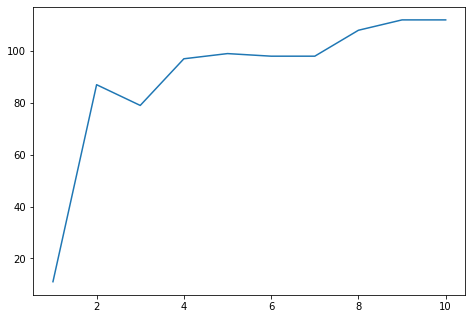

In [ ]:
import matplotlib.pyplot as plt
errorTest = []
errorTrain = []
ks = list(range(1,11))
for k in range(10):
    classifier = KNeighborsClassifier(n_neighbors=k+1 )
    classifier.fit(scaled_trainData, trainY)
    testPred = classifier.predict(scaled_testData)
    trainPred = classifier.predict(scaled_trainData)
    errorTest.append(sum((testPred - testY)**2))
    errorTrain.append(sum((trainPred - trainY)**2))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('test error')
ax.plot(ks , errorTest)
plt.show()


fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax.set_title('train error')
ax2.plot(ks , errorTrain)
plt.show()

As we can see,with k=8 we get the least error on test data. So for the next part, we use k = 8.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=8 )
classifier.fit(scaled_trainData, trainY)
testPred = classifier.predict(scaled_testData)

confMat = confusion_matrix(testY, testPred)
print('confusion matrix:')
print(confMat)

confusion matrix:
[[108  12]
 [ 17  42]]


In the last part we had:
confusion matrix=
[[101  19]
[ 12  47]]
 
 So as we can see, using 8NN we get a higher true positive (108) but we get a lower true negative. This means that 8NN might be better to secide if someone will survive. But to decide if someone will die, linear regression might be a better choice. Also for 8NN we have a lower false positive but a higher false negative.

### support vector

In [ ]:
from sklearn.svm import SVC
linearSVM = SVC(kernel='linear')
rbfSVM = SVC(kernel='rbf')
polySVM = SVC(kernel='poly')

#rbfSVM.fit(trainData, trainY)
#rbfSVM.fit(trainData, trainY)

#y_pred = linearSVM.predict(trainData)
#print(y_pred)

In [ ]:
linearSVM.fit(scaled_trainData, trainY)
trainPred_linear = linearSVM.predict(scaled_trainData)
print('linear SVM error on train' , sum((trainPred_linear - trainY)**2) / len(trainY))

testPred_linear = linearSVM.predict(scaled_testData)
print('linear SVM error on test' , sum((testPred_linear - testY)**2) / len(testY))

linear SVM error on train 0.16713483146067415
linear SVM error on test 0.1787709497206704


In [ ]:
rbfSVM.fit(scaled_trainData, trainY)
trainPred_rbf = rbfSVM.predict(scaled_trainData)
print('rbf SVM error on train' , sum((trainPred_rbf - trainY)**2) / len(trainY))

testPred_rbf = rbfSVM.predict(scaled_testData)
print('rbf SVM error on test' , sum((testPred_rbf - testY)**2) / len(testY))

rbf SVM error on train 0.14606741573033707
rbf SVM error on test 0.16759776536312848


In [ ]:
polySVM.fit(scaled_trainData, trainY)
trainPred_poly = polySVM.predict(scaled_trainData)
print('poly SVM error on train' , sum((trainPred_poly - trainY)**2) / len(trainY))

testPred_poly = polySVM.predict(scaled_testData)
print('poly SVM error on test' , sum((testPred_poly - testY)**2) / len(testY))

poly SVM error on train 0.12780898876404495
poly SVM error on test 0.18435754189944134


According to what we can see above, the lowest error (highest accuracy) on test data belongs to RBF kernel. Polynomial kernel gets a better result on train data, but it overfits on the test data. 

In [ ]:
from sklearn.metrics import f1_score
print('f1 score of linear svm' , f1_score(testY , testPred_linear))
print('f1 score of rbf svm' , f1_score(testY , testPred_rbf))
print('f1 score of poly svm' , f1_score(testY , testPred_poly))

f1 score of linear svm 0.7333333333333334
f1 score of rbf svm 0.7500000000000001
f1 score of poly svm 0.7130434782608696


f1 score is 2recall*precision/(recall+precision) . Since precision is not allways a good measure (for example when there is high true negetive) f1 score is used as a measure to balance precision and recall. As seen, RBF kernel has the highest f1 score which means that it has a better balance between its precision and recall.

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf pca SVM error on test 0.24022346368715083
rbf pca SVM error on train 0.175561797752809


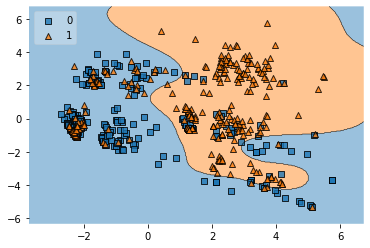

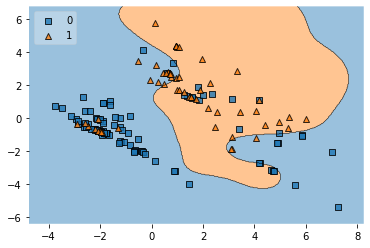

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
pcaTrain = pca.fit_transform(scaled_trainData)
pcaTest = pca.fit_transform(scaled_testData)


newlinearSVM = SVC(kernel='rbf')
newlinearSVM.fit(pcaTrain, trainY)
pca_testPred_linear = newlinearSVM.predict(pcaTest)
pca_trainPred_linear = newlinearSVM.predict(pcaTrain)
#print(pca_testPred_linear - testY)
print('rbf pca SVM error on test' , sum((pca_testPred_linear - testY)**2) / len(testY))
print('rbf pca SVM error on train' , sum((pca_trainPred_linear - trainY)**2) / len(trainY))
from mlxtend.plotting import plot_decision_regions

fig = plot_decision_regions(X=pcaTrain, y=np.array(trainY),clf=newlinearSVM, legend=2)
plt.show()

fig = plot_decision_regions(X=pcaTest, y=np.array(testY),clf=newlinearSVM, legend=2)

plt.show()

According to the plots and the error, we can see that the kernel does overfit on the train data because it has a higher error on the test data and specificly selects regions with label 1 on the train data that negetively effects any other data.

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(trainData , trainY)
gnbY = gnb.predict(testData)
print('gaussian naive bayes error' , sum((gnbY - testY)**2) / len(testY))

gaussian naive bayes error 0.2569832402234637


The smoothing is a technique used to "smooth" the categorical data and to solve the problem of zero probability. The smoothing parameter shows the portion of the largest variance that is added to the variances. A version of data smoothed by parameter 'p' gives the estimator "(x+p)/(N+p*d)" where d is the number of parameters and N is the number of trials.

In [ ]:
from sklearn.metrics import roc_auc_score
print ('auc score is ' , roc_auc_score(testY , gnbY))

auc score is  0.7652542372881356


AUC stands for Area Under Curve. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. So the higher the AUC score, the better. AUC score shows the area under the Receiver Operating Characteristics (ROC) curve plotted with true positive (TP) rate against the false positive (FP) rate where TP is on y-axis and FP is on the x-axis. AUC is specifically good for binary classifications with a threshold because it's goal is to maximize the true positive for minimum false positive 

### Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

param_scores = []
for depth in range(2 , 100):
    num_score = []
    for number_of_trees in range(2 , 100):
        rfc = clf = RandomForestClassifier(max_depth=depth, n_estimators = number_of_trees)
        num_score.append(np.mean(cross_val_score(rfc , trainData , trainY , cv = 5)))
    param_scores.append(num_score)



In [ ]:
p = np.array(param_scores)
max_place = np.where(p == np.max(p))
print(max_place)
print( np.max(p) , p[6][32])

(array([6], dtype=int64), array([32], dtype=int64))
0.8413050539511433 0.8413050539511433


Cross validation gives us the optimum parameters 6+2=8 for depth and 32+2=34 for the number of estimators

In [ ]:
rfc  = RandomForestClassifier(max_depth=8 , n_estimators = 34)
rfc.fit(trainData , trainY)
rfcY = rfc.predict(testData)
print(rfcY - testY)
print('f1 score' , f1_score(testY , rfcY))


0      0
1      0
2     -1
3      0
4      0
      ..
174    1
175    0
176    1
177    1
178    0
Name: Survived, Length: 179, dtype: int64
f1 score 0.7


f1 score is 0.7

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
#mlp2010 = MLPClassifier(hidden_layer_sizes = (20 , 10) , solver = 'adam', batch_size =32 , activation = 'relu' ,max_iter = 20 )
#mlp10050 = MLPClassifier(hidden_layer_sizes = (100 , 50) , solver = 'adam', batch_size =32 , activation = 'relu' ,max_iter = 20 )
mlp1_scores = []
mlp2_scores = []
for rate in range(1 , 10):
    s1 = []
    s2 = []
    for term in range(1 , 10):
        mlp2010 = MLPClassifier(alpha=0.1**term ,learning_rate_init = 0.1**rate ,hidden_layer_sizes = (20 , 10) , solver = 'adam', batch_size =32 , activation = 'relu' ,max_iter = 20 )
        mlp10050 = MLPClassifier(alpha=0.1**term ,learning_rate_init = 0.1**rate ,hidden_layer_sizes = (100 , 50) , solver = 'adam', batch_size =32 , activation = 'relu' ,max_iter = 20 )
        s1.append(np.mean(cross_val_score(mlp2010 , scaled_trainData , trainY , cv = 5)))
        s2.append(np.mean(cross_val_score(mlp10050 , scaled_trainData , trainY , cv = 5)))
    mlp1_scores.append(s1)
    mlp2_scores.append(s2)
    
    
p = np.array(mlp1_scores)
max_place = np.where(p == np.max(p))
print('rate , term for 20-10')
print(max_place)
print(np.max(p))

p = np.array(mlp2_scores)
print('rate , term for 100-50')
max_place = np.where(p == np.max(p))
print(max_place)
print(np.max(p))

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: 

rate , term for 20-10
(array([1], dtype=int64), array([0], dtype=int64))
0.8427730196085006
rate , term for 100-50
(array([1], dtype=int64), array([0], dtype=int64))
0.8441516429829287


by using 5-fold cross validation we reach 0.01 for learning rate and 0.1 for alpha for both neural networks.

In [ ]:
mlp2010 = MLPClassifier(alpha=0.1**1 ,learning_rate_init = 0.1**2 ,hidden_layer_sizes = (20 , 10) , solver = 'adam', batch_size =32 , activation = 'relu' ,max_iter = 20 )
mlp10050 = MLPClassifier(alpha=0.1**1 ,learning_rate_init = 0.1**2 ,hidden_layer_sizes = (100 , 50) , solver = 'adam', batch_size =32 , activation = 'relu' ,max_iter = 20 )
mlp2010.fit(scaled_trainData , trainY)
mlp10050.fit(scaled_trainData , trainY)
mlp1_pred = mlp2010.predict(scaled_testData)
mlp2_pred = mlp10050.predict(scaled_testData)
print(sum((testY - mlp1_pred)**2)/ len(mlp1_pred) , sum((testY - mlp2_pred)**2)/len(mlp1_pred))
confMat = confusion_matrix(testY, mlp1_pred)
print('confusion matrix of first mlp:')
print(confMat)

confMat = confusion_matrix(testY, mlp2_pred)
print('confusion matrix of second mlp:')
print(confMat)

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.21787709497206703 0.1564245810055866
confusion matrix of first mlp:
[[99 21]
 [18 41]]
confusion matrix of second mlp:
[[107  13]
 [ 15  44]]


c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The second MLP gets a higher accuracy and by looking at their confusion matrices we can see that it has both higher true positive and true negative. However, the second MLP has more nodes and has a higher training overhead. Since our data isn't too big, it's better to use the second MLP. 

### Part 4

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
train = trainData.drop(['E1E0' , 'E0' , 'E1' , 'OtherTitles'] , axis=1)
test = testData.drop(['E1E0', 'E0' , 'E1'  , 'OtherTitles'] , axis=1)
test['Adult'] = test.apply(
    lambda row: 1 if row['Age']<=35 and row['Age']>18 else 0,
    axis=1
)
train['Adult'] = train.apply(
    lambda row: 1 if row['Age']<=35 and row['Age']>18 else 0,
    axis=1
)
mlp2010 = MLPClassifier(alpha=0.05 ,learning_rate_init = 0.1**2 ,hidden_layer_sizes = (20 , 10) , solver = 'adam', batch_size =30 , activation = 'logistic' ,max_iter = 20 )
mlp10050 = MLPClassifier(alpha=0.1 ,learning_rate_init = 0.001 ,hidden_layer_sizes = ( 50 , 100  ) , solver = 'adam', batch_size =30 , activation = 'relu' ,max_iter = 20 )
mlp2010.fit(train , trainY)
mlp10050.fit(train , trainY)
mlp1_pred = mlp2010.predict(test)
mlp2_pred = mlp10050.predict(test)
print(sum((testY - mlp1_pred)**2)/ len(mlp1_pred) , sum((testY - mlp2_pred)**2)/len(mlp1_pred))

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.16759776536312848 0.18994413407821228


c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100 , max_depth = 4)
random_forest.fit(train, trainY)
rfY = random_forest.predict(test)
#print(y_pred)
print(sum((rfY - testY)**2) / len(testY))

0.1452513966480447


In [ ]:
print(sum((y_pred - testY)))
print(sum((y_pred - testY)**2))

3
31


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Instantiate our model
adaboost = AdaBoostClassifier(n_estimators=1000 , learning_rate=0.005)# Fit our model to the training data
adaboost.fit(train, trainY)# Predict on the test data
boostY = adaboost.predict(test)
print(sum((boostY - testY)**2) / len(testY))

0.1452513966480447


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 3)
tree_model.fit(train , trainY)
y_pred = tree_model.predict(test)
print(sum((y_pred - testY)**2) / len(testY))

0.1564245810055866


As seen above, we used multiple methods and found the best result in Random forest with 100 estimators with max length 4 and Ada Boost classifier with 1000 estimators and 0.005 learning rate

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
print('accuracy of rf' , 1-sum((rfY - testY)**2) / len(testY))
print('accuracy of boosting' , 1-sum((boostY - testY)**2) / len(testY))
print('log loss rf : ' , log_loss(testY , rfY))
print('log loss boosting : ' ,  log_loss(testY , boostY))
print('conf mat rf : ' , confusion_matrix(testY , rfY))
print('conf mat boosting : ' ,  confusion_matrix(testY , boostY))
import numpy as np
from sklearn.metrics import roc_auc_score , f1_score
print ('auc of rf ' , roc_auc_score(testY , rfY))
print ('auc of boosting ' , roc_auc_score(testY , boostY))
print('f1 score rf' , f1_score(testY , rfY))
print('f1 score boosting' , f1_score(testY , boostY))
print('MAE of rf' , sum(np.abs(rfY - testY)) / len(testY))
print('MAE of boosting' , sum(np.abs(boostY - testY)) / len(testY))

accuracy of rf 0.8547486033519553
accuracy of boosting 0.8547486033519553
log loss rf :  5.0168635811970415
log loss boosting :  5.0168635811970415
conf mat rf :  [[107  13]
 [ 13  46]]
conf mat boosting :  [[107  13]
 [ 13  46]]
auc of rf  0.8356638418079096
auc of boosting  0.8356638418079096
f1 score rf 0.7796610169491526
f1 score boosting 0.7796610169491526
MAE of rf 0.1452513966480447
MAE of boosting 0.1452513966480447


All metrics for Ada boostinga and random forest are the same. By comparing confusion matrix with the previous parts we can see that we have same true positive and false positive with the MLP but a higher true negative and lesser false negative which means the classifying in this case was better. Also we have less true positive than k-nearest neighbours.
F1 score is almost equal to 0.78 which is higher than all SVMs and the previous random forest

In [ ]:
newData = pd.concat([train , test])
newTest = newData[0:89]
newTrain = newData[89:]
newY = pd.concat([trainY , testY])
newTestY = newY[0:89]
newTrainY = newY[89:]

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100 , max_depth = 4)
random_forest.fit(newTrain, newTrainY)
rfY = random_forest.predict(newTest)
#print(y_pred)
print(sum((rfY - newTestY)**2) / len(newTestY))

adaboost = AdaBoostClassifier(n_estimators=1000 , learning_rate=0.005)
adaboost.fit(newTrain, newTrainY)
boostY = adaboost.predict(newTest)
print(sum((boostY - newTestY)**2) / len(newTestY))

0.21348314606741572
0.21348314606741572


In [ ]:

print('accuracy of rf' , 1-sum((rfY - newTestY)**2) / len(newTestY))
print('accuracy of boosting' , 1-sum((boostY - newTestY)**2) / len(newTestY))
print('log loss rf : ' , log_loss(newTestY , rfY))
print('log loss boosting : ' ,  log_loss(newTestY , boostY))
print('conf mat rf : ' , confusion_matrix(newTestY , rfY))
print('conf mat boosting : ' ,  confusion_matrix(newTestY , boostY))

print ('auc of rf ' , roc_auc_score(newTestY , rfY))
print ('auc of boosting ' , roc_auc_score(newTestY , boostY))
print('f1 score rf' , f1_score(newTestY , rfY))
print('f1 score boosting' , f1_score(newTestY , boostY))
print('MAE of rf' , sum(np.abs(rfY - newTestY)) / len(newTestY))
print('MAE of boosting' , sum(np.abs(boostY - newTestY)) / len(newTestY))

accuracy of rf 0.7865168539325843
accuracy of boosting 0.7865168539325843
log loss rf :  7.373518520030838
log loss boosting :  7.373518520030838
conf mat rf :  [[47  8]
 [11 23]]
conf mat boosting :  [[47  8]
 [11 23]]
auc of rf  0.7655080213903743
auc of boosting  0.7655080213903743
f1 score rf 0.7076923076923077
f1 score boosting 0.7076923076923077
MAE of rf 0.21348314606741572
MAE of boosting 0.21348314606741572


We can see that there's been an overfit on the train data which has led to not so good results on the test data. We might have to change our parameters or classification method in order to get better results.